### Isolation Forest

Isolation Forest is an unsupervised anomaly detection method that isolates anomalies by randomly partitioning data. The model assigns an Anomaly Score (+1 for normal, -1 for anomalies).

The scatter plot below shows blue points as normal observations, and red points as detected anomalies. As one can see, it did erroneously spot some anomalies where there were none (in the left part of the graph), but on the whole it did a pretty good job!

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
n_samples = 200
data = pd.DataFrame({
    "Feature_1": np.random.normal(50, 10, n_samples),
    "Feature_2": np.random.normal(30, 5, n_samples)
})
# Add anomalies
data.loc[np.random.choice(n_samples, 5), "Feature_1"] *= 4
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

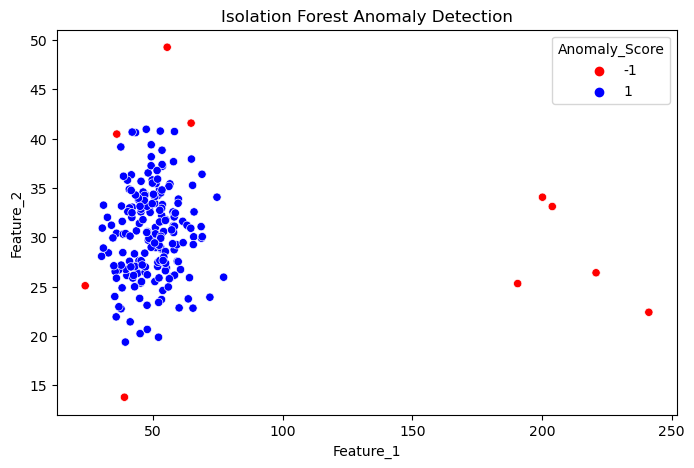

In [3]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data["Anomaly_Score"] = iso_forest.fit_predict(data_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="Feature_1", y="Feature_2", hue="Anomaly_Score", palette={1: "blue", -1: "red"})
plt.title("Isolation Forest Anomaly Detection")
plt.show()